# Cost Function

Example: IMDB 



In [1]:
## Imports 
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.style.use('bmh')

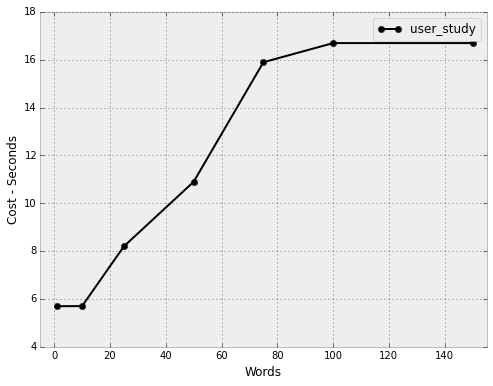

In [70]:
def user_study(x):
    imdb = {10:5.7, 25:8.2, 50:10.9,75:15.9,100:16.7}
    return [imdb[v] if v in imdb.keys() else max(imdb.values()) if v > max(imdb.keys()) else min(imdb.values()) for v in x]
#     return [1] * len(x)

def plot_cost(fns, x=None, labels=None):
    r = {10:5.7, 25:8.2, 50:10.9,75:15.9,100:16.7}
    fig = plt.figure(figsize=(8,6))
    if x is None:
        x = sorted(r.keys())
        x = [1] + x + [150]#,200]
    first = True
    if labels is None:
        fn_labels=[fn.__name__ for fn in fns]
    else:
        fn_labels=labels
    for fn,lbl in zip(fns, fn_labels):
        if first:
            plt.plot(x, fn(x),'ko-', label=lbl)
            first=False
        else:
            plt.plot(x, fn(x),'o-', label=lbl)
    plt.legend(loc='best')
    plt.xlabel('Words')
    plt.ylabel('Cost - Seconds')
    plt.xlim([-5,155])

plot_cost([user_study])


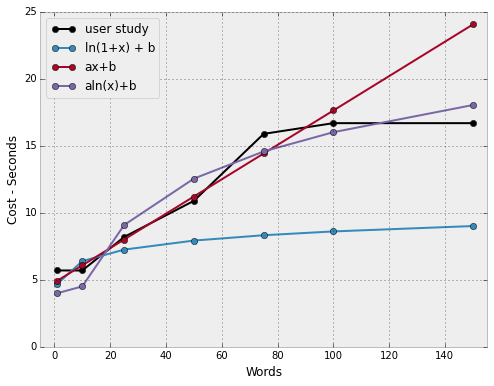

In [73]:
def log_cost(x):
    return np.log(1+np.array(x))+4

def log_cost_2(x):
    y = np.log(np.array(x))*5-7
    y[y<=0] = 4
    return y


from scipy import stats

def linear_cost(x):
    slope, intercept,_,_,_ = stats.linregress(sorted(imdb.keys()),sorted(imdb.values()))
    return slope*np.array(x) + intercept

plot_cost([user_study, log_cost, linear_cost, log_cost_2], 
          labels=['user study', 'ln(1+x) + b','ax+b', 'aln(x)+b'])
plt.savefig("../graphs/cost_functions1" + ".pdf", bbox_inches="tight", dpi=200, transparent=True)

In [68]:
slope, intercept,_,_,_ = stats.linregress([10,50],[5.7,10.9])

In [69]:
print slope, intercept

0.13 4.4


In [50]:
print sorted(imdb.keys()), sorted(imdb.values())

[10, 25, 50, 75, 100] [5.7, 8.2, 10.9, 15.9, 16.7]
